In [1]:
import pandas as pd
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df=pd.read_csv(test_file)

# Preprocessing and Tokenizing for DL Models


In [2]:
import pandas as pd

# Function to map original labels to binary values
def map_labels(df):
    label_mapping = {'__label__0': 0, '__label__1': 1}
    if 'label' in df.columns:
        df['label'] = df['label'].map(label_mapping)
    return df

# Function to ensure text column is string type and handle missing values
def preprocess_text_column(df):
    df['text'] = df['text'].fillna('').astype(str)
    return df
    
# Apply functions to preprocess train_df and test_df
train_df = map_labels(train_df)
test_df = map_labels(test_df)

train_df = preprocess_text_column(train_df)
test_df = preprocess_text_column(test_df)


In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize text data
def tokenize_texts(train_texts, test_texts, num_words=None):
    # Convert all values to strings to ensure tokenizer compatibility
    train_texts = [str(text) for text in train_texts]
    test_texts = [str(text) for text in test_texts]
    
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(train_texts)
    
    X_train_seq = tokenizer.texts_to_sequences(train_texts)
    X_test_seq = tokenizer.texts_to_sequences(test_texts)
    
    return tokenizer, X_train_seq, X_test_seq

# Function to pad sequences
def pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length):
    X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)
    return X_train_padded, X_test_padded

# Function to extract labels
def extract_labels(train_data, test_data):
    y_train = train_data['label'].values
    y_test = test_data['label'].values
    return y_train, y_test

tokenizer, X_train_seq, X_test_seq = tokenize_texts(train_df['text'], test_df['text'], num_words=5000)
X_train_padded, X_test_padded = pad_sequences_data(X_train_seq, X_test_seq, max_sequence_length=100)
y_train, y_test = extract_labels(train_df, test_df)


# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) play a crucial role in text classification, providing a robust and efficient approach to understanding and categorizing text data. While traditionally associated with image processing, CNNs have proven to be highly effective in handling the intricacies of natural language processing (NLP) tasks.

Epoch 1/5


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 46s 90ms/step - accuracy: 0.6690 - loss: 0.5852 - val_accuracy: 0.8352 - val_loss: 0.4267
Epoch 2/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8750 - loss: 0.3042 - val_accuracy: 0.8269 - val_loss: 0.4397
Epoch 3/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9437 - loss: 0.1547 - val_accuracy: 0.7922 - val_loss: 0.5602
Epoch 4/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9721 - loss: 0.0773 - val_accuracy: 0.8310 - val_loss: 0.6525
Epoch 5/5
477/477 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9797 - loss: 0.0509 - val_accuracy: 0.8120 - val_loss: 0.8203
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7997 - loss: 0.4795
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
CNN Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

     Class 0       0.92      0.72      0.81      4803
     Class 1       0.23      0.56      0.33       707

    accuracy               

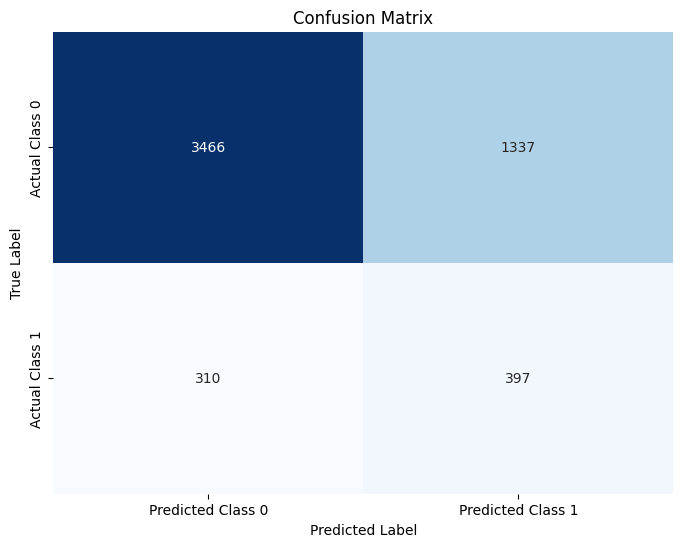

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=64,
                        validation_data=(X_val_padded, y_val),
                        callbacks=[early_stopping])

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, test_df['label'].values)
cnn_y_pred = cnn_model.predict(X_test_padded)
cnn_y_pred_classes = (cnn_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
cnn_y_pred_classes_adjusted = (cnn_y_pred > threshold).astype(int).flatten()

# Print classification report
cnn_report = classification_report(test_df['label'].values, cnn_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("CNN Model Classification Report with Adjusted Threshold:\n", cnn_report)

# Print confusion matrix
cnn_conf_matrix = confusion_matrix(test_df['label'].values, cnn_y_pred_classes_adjusted)
print("Confusion Matrix:\n", cnn_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/20


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.7368 - loss: 0.5045 - val_accuracy: 0.8685 - val_loss: 0.4146
Epoch 2/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9747 - loss: 0.0721 - val_accuracy: 0.8850 - val_loss: 0.6585
Epoch 3/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9932 - loss: 0.0185 - val_accuracy: 0.8841 - val_loss: 0.8210
Epoch 4/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9934 - loss: 0.0186 - val_accuracy: 0.8905 - val_loss: 0.9906
Epoch 5/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9929 - loss: 0.0204 - val_accuracy: 0.8854 - val_loss: 1.1496
Epoch 6/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9949 - loss: 0.0133 - val_accuracy: 0.8758 - val_loss: 1.0706
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8629 - loss: 0.4375
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
CNN Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

  

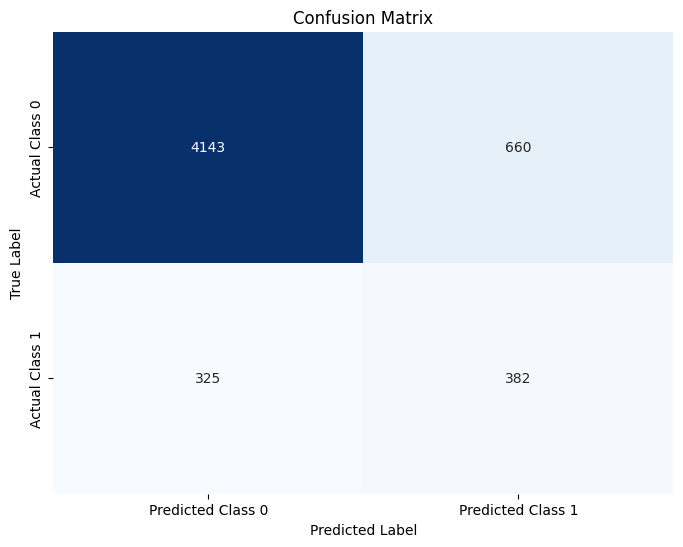

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = cnn_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64,
                        validation_data=(X_val_padded, y_val),
                        callbacks=[early_stopping])

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, test_df['label'].values)
cnn_y_pred = cnn_model.predict(X_test_padded)
cnn_y_pred_classes = (cnn_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
cnn_y_pred_classes_adjusted = (cnn_y_pred > threshold).astype(int).flatten()

# Print classification report
cnn_report = classification_report(test_df['label'].values, cnn_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("CNN Model Classification Report with Adjusted Threshold:\n", cnn_report)

# Print confusion matrix
cnn_conf_matrix = confusion_matrix(test_df['label'].values, cnn_y_pred_classes_adjusted)
print("Confusion Matrix:\n", cnn_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Alteration-1

Epoch 1/20


C:\Users\BHARGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


477/477 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7313 - loss: 0.5103 - val_accuracy: 0.8609 - val_loss: 0.4034
Epoch 2/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9619 - loss: 0.1121 - val_accuracy: 0.8827 - val_loss: 0.5717
Epoch 3/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9905 - loss: 0.0317 - val_accuracy: 0.8841 - val_loss: 0.8567
Epoch 4/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.9924 - loss: 0.0214 - val_accuracy: 0.8643 - val_loss: 0.9028
Epoch 5/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9933 - loss: 0.0161 - val_accuracy: 0.8687 - val_loss: 0.9860
Epoch 6/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9947 - loss: 0.0144 - val_accuracy: 0.8779 - val_loss: 1.1450
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8578 - loss: 0.4296
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
CNN Model Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support



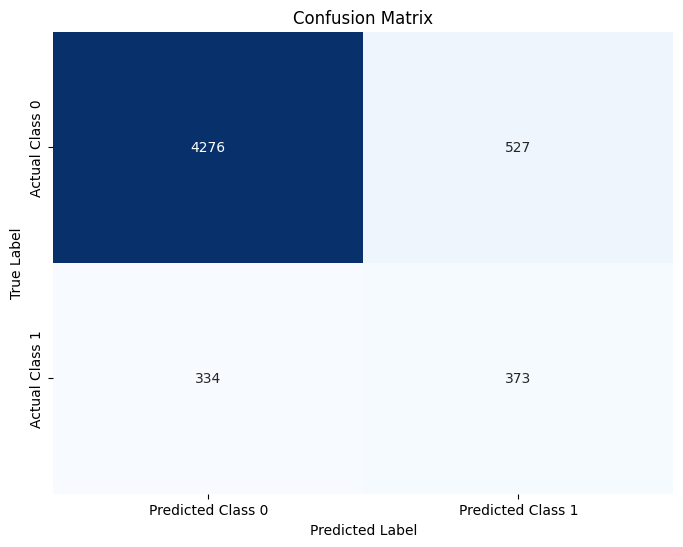

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Load datasets
train_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv")
test_df = pd.read_csv(r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv")

# Replace NaN values with empty strings
train_df['text'] = train_df['text'].fillna('')
test_df['text'] = test_df['text'].fillna('')

# Extract texts and labels
X = train_df['text'].values.astype(str)
y = train_df['label'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize texts
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'].values.astype(str))

# Pad sequences
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Apply Random Oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_padded, y_train)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(256, 2, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Conv1D(128, 2, activation='relu'))
cnn_model.add(MaxPooling1D(5))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with oversampled data
history = cnn_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64,
                        validation_data=(X_val_padded, y_val),
                        callbacks=[early_stopping])

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, test_df['label'].values)
cnn_y_pred = cnn_model.predict(X_test_padded)
cnn_y_pred_classes = (cnn_y_pred > 0.5).astype(int).flatten()

# Adjust threshold for classification to reduce false negatives
threshold = 0.3
cnn_y_pred_classes_adjusted = (cnn_y_pred > threshold).astype(int).flatten()

# Print classification report
cnn_report = classification_report(test_df['label'].values, cnn_y_pred_classes_adjusted, target_names=['Class 0', 'Class 1'])
print("CNN Model Classification Report with Adjusted Threshold:\n", cnn_report)

# Print confusion matrix
cnn_conf_matrix = confusion_matrix(test_df['label'].values, cnn_y_pred_classes_adjusted)
print("Confusion Matrix:\n", cnn_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
